### Problem Statement

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#!pip install mlxtend
from mlxtend.preprocessing import transactionencoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
movies = pd.read_csv('my_movies.csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [4]:
movies.shape

(10, 15)

### Data preprocessing 

In [6]:
data = movies.iloc[:, 5:]
data.shape

(10, 10)

### Apriori Algorithm

##### min_support = 0.2, confidence = 0.6

In [29]:
frequent_items = apriori(data, min_support = 0.2, use_colnames = True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [30]:
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [31]:
rules.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
13,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


In [47]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>=1.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf


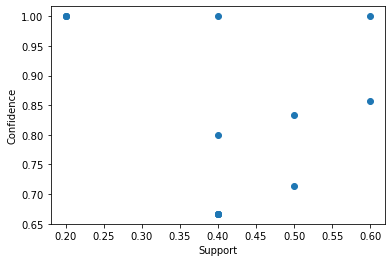

In [33]:
#Visualization of abtained rules 
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

##### min_support = 0.15, confidence = 0.5

In [41]:
frequent_items = apriori(data, min_support = 0.15, use_colnames = True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [42]:
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [43]:
rules.sort_values(by = 'confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [45]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf


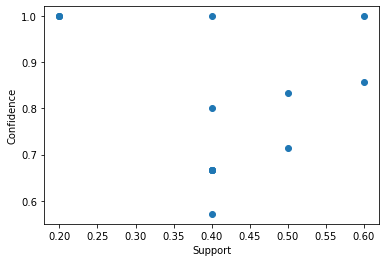

In [46]:
#Visualization of abtained rules 
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()